# Project: No-Show Appointments Data Analysis 
## By : Dhuha Baqarish 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project i investigate a dataset called no show appointments.
 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. 
   -  ‘ScheduledDay’ tells us on what day the patient set up their appointment.
   -  ‘Neighborhood’ indicates the location of the hospital.
   - ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
   -  ‘No_show’ it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
   
The Questions I'm trying to answer :
   -  What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [71]:
#import important Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

% matplotlib inline

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling
In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [72]:
# Load the data and print out a few lines.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [73]:
# the rows and columns that this data set have 
df.shape

(110527, 14)

In [74]:
# sumry of data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [75]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [76]:
# checking for null values 
pd.isna(df).sum()
# no null values in here 

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [77]:
# check if there is a dplicates in the data 
df.duplicated().sum()
# no duplicate values in here 

0

### Data Cleaning 

In [78]:
# drop the columns that i not use
df.drop(['AppointmentID', 'Neighbourhood'] ,axis =1, inplace=True )
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


In [79]:
# checking the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(7), object(4)
memory usage: 10.1+ MB


In [80]:
# converting ScheduledDay and AppointmentDay columns from object datetype to a datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [81]:
# checking the info of the data (data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 10.1+ MB


In [82]:
# rename the column names correctly
df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace = True)
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,No
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,No
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,No
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,No
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,No


In [83]:
# checking the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
PatientId         110527 non-null float64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(7), object(2)
memory usage: 10.1+ MB


In [84]:
# replace values of Gender to '1'for M' and '0' for 'F'
df['Gender'] = df['Gender'].map({'M':1,'F':0})
# replace values of No_show to '1' for 'Yes' and '0' for 'No'  
df['No_show'] = df['No_show'].map({'Yes':1, 'No':0})
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,0,2016-04-29 18:38:08,2016-04-29,62,0,1,0,0,0,0,0
1,5.589978e+14,1,2016-04-29 16:08:27,2016-04-29,56,0,0,0,0,0,0,0
2,4.262962e+12,0,2016-04-29 16:19:04,2016-04-29,62,0,0,0,0,0,0,0
3,8.679512e+11,0,2016-04-29 17:29:31,2016-04-29,8,0,0,0,0,0,0,0
4,8.841186e+12,0,2016-04-29 16:07:23,2016-04-29,56,0,1,1,0,0,0,0


In [85]:
# checking the info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
PatientId         110527 non-null float64
Gender            110527 non-null int64
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9)
memory usage: 10.1 MB


<a id='eda'></a>
## Exploratory Data Analysis
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7F2BD26A0>,
      dtype=object)

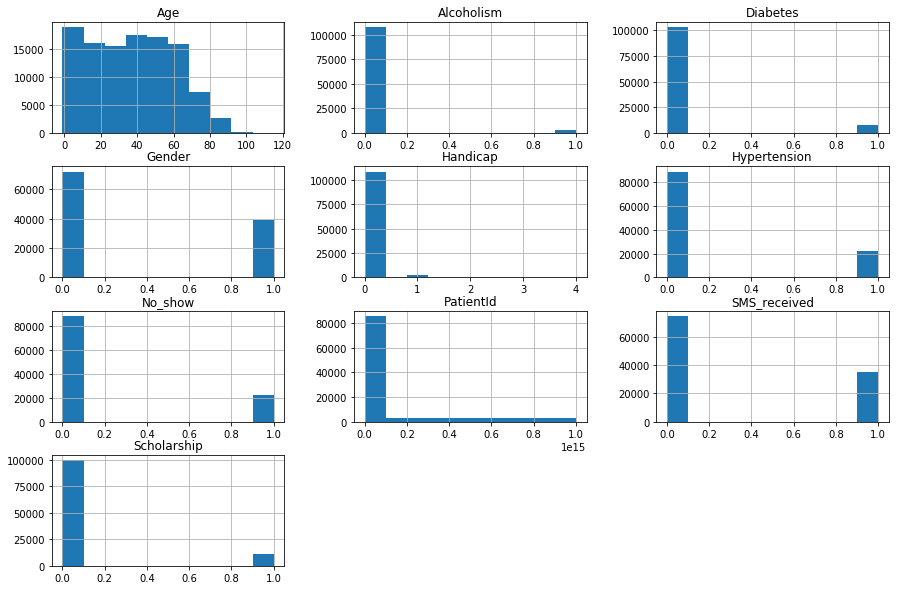

In [98]:
# View all the factors's histogram
df.hist(figsize=(15,10))

In [86]:
# checking for percentage of patients who show up or not show up
no_show = df["No_show"].value_counts()
percent_show = no_show / no_show.sum() * 100
print("percentage of patients who show up or not show up:",percent_show )

# less than 35% of patients didn't come 

percentage of patients who show up or not show up: 0    79.806744
1    20.193256
Name: No_show, dtype: float64


In [87]:
# calculating the people who received SMS and if they showed up or not.
df.groupby('SMS_received')['No_show'].mean()


SMS_received
0    0.167033
1    0.275745
Name: No_show, dtype: float64

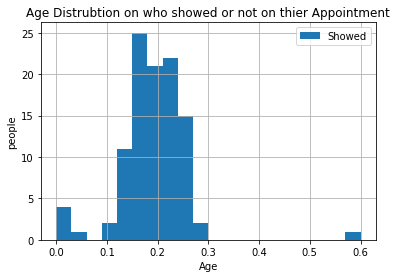

In [88]:
# View the attendance rate of appointments for age
df.groupby('Age')['No_show'].mean().hist(bins=20,label='Showed')
plt.title('Age Distrubtion on who showed or not on thier Appointment')
plt.xlabel('Age')
plt.ylabel('people')
plt.legend();


#### The no-show rate then decreases after around 70 year old patients. 


SMS_received
0    0.167033
1    0.275745
Name: No_show, dtype: float64


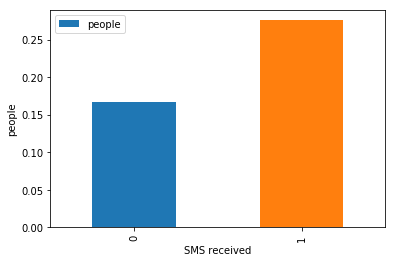

In [89]:
# show the percentage of people who receive SMS reminders for appointments
df.groupby('SMS_received')['No_show'].mean().plot(kind='bar',label='people')
plt.xlabel('SMS received')
plt.ylabel('people')
plt.legend();
print(df.groupby('SMS_received')['No_show'].mean())

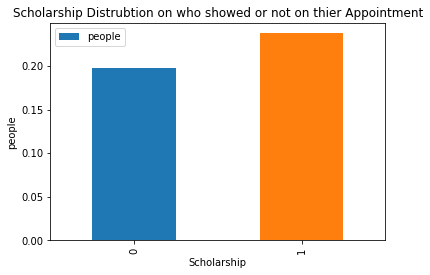

In [109]:
# View the attendance rate of appointments for Scholarship
df.groupby('Scholarship')['No_show'].mean().plot(kind='bar',label='people')
# df.groupby('Scholarship')['No_show'].mean().bar(label='Showed')
plt.title('Scholarship Distrubtion on who showed or not on thier Appointment')
plt.xlabel('Scholarship')
plt.ylabel('people')
plt.legend();



## Conclusions
- Reminder SMS did not contribute to the patient's access significantly
- Depending on age, we see missed appointments for patients after around 70 year old more than others. 
- Also scholarships is not important factor in not attending patients who is didn't have scholarships (or have it by less value)

#### In general, the factors involved don't significantly affect the patient's attendance of appointment

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])